In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
dados = pd.read_csv('/content/dados - dados.csv')
avaliacoes = pd.read_csv('/content/avaliacoes - avaliacoes.csv')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         1465 non-null   object
 1   product_name       1465 non-null   object
 2   category           1465 non-null   object
 3   geral_category     1465 non-null   object
 4   subcategoria       1465 non-null   object
 5   actual_price       1465 non-null   object
 6   product_price      1465 non-null   object
 7   actual_real_price  1465 non-null   object
 8   discount_percent   1465 non-null   object
 9   rating             1465 non-null   object
 10  rating_count       1465 non-null   int64 
 11  about_product      1465 non-null   object
 12  product_link       1465 non-null   object
dtypes: int64(1), object(12)
memory usage: 148.9+ KB


In [4]:
dados.head()

,product_id,product_name,category,geral_category,subcategoria,actual_price,product_price,actual_real_price,discount_percent,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹399,00","₹1.099,00","R$ 23,88","63,69%","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹199,00","₹349,00","R$ 11,91","42,98%",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹199,00","₹1.899,00","R$ 11,91","89,52%","4,52",7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹329,00","₹699,00","R$ 19,69","52,93%","4,5",94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹154,00","₹399,00","R$ 9,22","61,40%","4,5",16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
dados['actual_price'] = dados['actual_price'].str.replace('₹', '')
dados['actual_price'] = dados['actual_price'].str.replace('.', '')
dados['actual_price'] = dados['actual_price'].str.replace(',', '.')
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

<ipython-input-5-7aeefe58875c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['actual_price'] = dados['actual_price'].str.replace('.', '')


In [6]:
dados['product_price'] = dados['product_price'].str.replace('₹', '')
dados['product_price'] = dados['product_price'].str.replace('.', '')
dados['product_price'] = dados['product_price'].str.replace(',', '.')
dados['product_price'] = pd.to_numeric(dados['product_price'])

<ipython-input-6-ef6673303dcf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['product_price'] = dados['product_price'].str.replace('.', '')


In [7]:
dados['rating'] = dados['rating'].str.replace(',', '.')
dados['rating'] = pd.to_numeric(dados['rating'])

In [8]:
dados['actual_pricebrl'] = dados['actual_price'] * 0.06
dados['product_pricebrl'] = dados['product_price'] * 0.06


In [9]:
dados.head()

,product_id,product_name,category,geral_category,subcategoria,actual_price,product_price,actual_real_price,discount_percent,rating,rating_count,about_product,product_link,actual_pricebrl,product_pricebrl
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"R$ 23,88","63,69%",4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,23.94,65.94
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,349.0,"R$ 11,91","42,98%",4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,11.94,20.94
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,1899.0,"R$ 11,91","89,52%",4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,11.94,113.94
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,329.0,699.0,"R$ 19,69","52,93%",4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,19.74,41.94
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,154.0,399.0,"R$ 9,22","61,40%",4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,9.24,23.94


In [10]:
dados.describe()

,actual_price,product_price,rating,rating_count,actual_pricebrl,product_pricebrl
count,1465.000000,1465.000000,1465.000000,1.465000e+03,1465.000000,1465.000000
mean,3077.617693,5365.248840,4.432198,2.166947e+04,184.657062,321.914930
std,6860.277463,10743.796284,0.226138,9.132905e+04,411.616648,644.627777
min,2.500000,38.000000,0.000000,0.000000e+00,0.150000,2.280000
25%,314.000000,800.000000,4.490000,9.100000e+02,18.840000,48.000000
50%,799.000000,1645.000000,4.500000,4.003000e+03,47.940000,98.700000
75%,1999.000000,4199.000000,4.510000,1.466700e+04,119.940000,251.940000
max,77990.000000,139900.000000,5.000000,2.051952e+06,4679.400000,8394.000000


In [11]:
avaliacoes = pd.read_csv('/content/avaliacoes - avaliacoes.csv')

In [12]:
dados_avaliacoes = pd.merge(dados, avaliacoes, on='product_id')
dados_avaliacoes.head()

,product_id,product_name,category,geral_category,subcategoria,actual_price,product_price,actual_real_price,discount_percent,rating,...,about_product,product_link,actual_pricebrl,product_pricebrl,user_id,user_name,review_id,review_title,review_content,img_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"R$ 23,88","63,69%",4.5,...,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,23.94,65.94,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"R$ 23,88","63,69%",4.5,...,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,23.94,65.94,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/51UsScvHQN...
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"R$ 23,88","63,69%",4.5,...,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,23.94,65.94,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...
3,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"R$ 23,88","63,69%",4.5,...,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,23.94,65.94,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...
4,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"R$ 23,88","63,69%",4.5,...,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,23.94,65.94,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/51UsScvHQN...


In [13]:
avaliacoes_acima_de_4_5 = dados[dados['rating'] > 4.5]
contagem_avaliacoes_acima_de_4_5 = avaliacoes_acima_de_4_5['rating'].value_counts().sort_index()

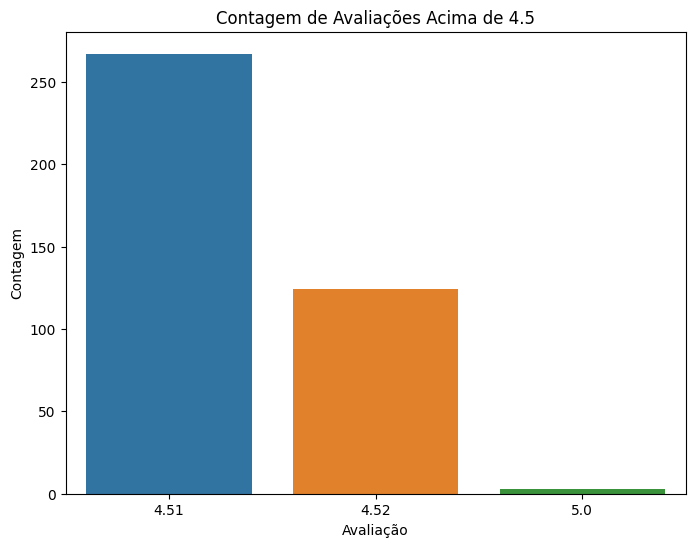

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x = contagem_avaliacoes_acima_de_4_5.index, y = contagem_avaliacoes_acima_de_4_5.values)
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.title('Contagem de Avaliações Acima de 4.5')
plt.show()

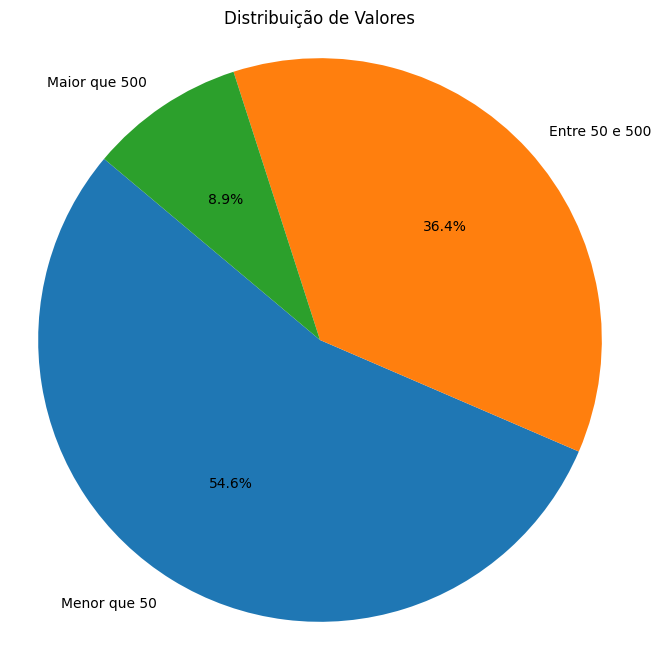

In [21]:
dados_avaliacoes['Categoria'] = pd.cut(dados_avaliacoes['actual_pricebrl'], bins=[-float("inf"), 50, 500, float("inf")],
                              labels=['Menor que 50', 'Entre 50 e 500', 'Maior que 500'])
contagens = da_copy['Categoria'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(contagens, labels=contagens.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Valores')
plt.axis('equal')
plt.show()